# Customer Churn Prediction 
## Problem Statement:
The problem of churn is a problem when a number of individuals move out of a collective group. It is one of the main problems that determine the steady-state level of customers in any type of business.

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the dataset
data = pd.read_csv('../data/churn-train.csv')

# Data Exploration

**Data exploration findings:**
- The Churn feature is our target variable. It is a string with values 'Yes' or 'No'. 

- There are 10 duplicate rows in the data set. It is normal to have duplicated rows since we don't have a customer ID, thus some customers may have the same features.

- The data set contains several categorical variables, which are the object type.

- The SeniorCitizen feature represents if a customer is a senior citizen (i.e. age range < 67), where 1=True and 0=False. Let's convert it to object type and replace 0 with 'No' and 1 with 'Yes'.

- The totalCharges feature is the total amount charged to the customer. We need to convert it to numerical data type. Also, there are 6 missing values in the totalCharges feature, containg "?". We need to remove them as well.

In [3]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,61,No,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.2,No
1,Male,0,Yes,Yes,72,Yes,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,No
2,Female,0,No,No,5,Yes,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,No
3,Female,0,No,No,49,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,No
4,Male,0,No,No,8,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.9,No
5,Male,0,No,No,3,Yes,No,'Fiber optic',No,No,No,No,No,Yes,Month-to-month,Yes,'Electronic check',80.35,253.8,No
6,Male,0,Yes,Yes,9,Yes,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service','Two year',No,'Mailed check',19.60,197.4,No
7,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,Yes,No,No,No,No,'Two year',Yes,'Bank transfer (automatic)',54.20,3838.2,No
8,Male,0,No,No,46,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,'Credit card (automatic)',45.20,2065.15,No
9,Female,0,Yes,No,67,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,'One year',No,'Mailed check',75.10,5064.45,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4695 non-null   object 
 1   SeniorCitizen     4695 non-null   int64  
 2   Partner           4695 non-null   object 
 3   Dependents        4695 non-null   object 
 4   tenure            4695 non-null   int64  
 5   PhoneService      4695 non-null   object 
 6   MultipleLines     4695 non-null   object 
 7   InternetService   4695 non-null   object 
 8   OnlineSecurity    4695 non-null   object 
 9   OnlineBackup      4695 non-null   object 
 10  DeviceProtection  4695 non-null   object 
 11  TechSupport       4695 non-null   object 
 12  StreamingTV       4695 non-null   object 
 13  StreamingMovies   4695 non-null   object 
 14  Contract          4695 non-null   object 
 15  PaperlessBilling  4695 non-null   object 
 16  PaymentMethod     4695 non-null   object 


In [5]:
# Check for duplicated rows 
data.duplicated().sum()


10

In [6]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1423
TotalCharges        4429
Churn                  2
dtype: int64

In [8]:
for col in data.columns:
    print(f'\n{col} : {data[col].unique()}')
    print(f'{col} : {data[col].dtype}')


gender : ['Male' 'Female']
gender : object

SeniorCitizen : [0 1]
SeniorCitizen : int64

Partner : ['Yes' 'No']
Partner : object

Dependents : ['Yes' 'No']
Dependents : object

tenure : [61 72  5 49  8  3  9 67 46 55 33 62  1 14 18 64 69 71 66  2 11 47 35 32
 60 29 21 48 43 20 31 38 12  6 42 45 28  7 25 40 27 10  4 68 57 26 17 59
 30 50 15 70 53 56 24 39 13 41 44 34 23 52 16 36 65 58 37 63 22 19 51 54
  0]
tenure : int64

PhoneService : ['No' 'Yes']
PhoneService : object

MultipleLines : ["'No phone service'" 'Yes' 'No']
MultipleLines : object

InternetService : ['DSL' "'Fiber optic'" 'No']
InternetService : object

OnlineSecurity : ['Yes' 'No' "'No internet service'"]
OnlineSecurity : object

OnlineBackup : ['No' 'Yes' "'No internet service'"]
OnlineBackup : object

DeviceProtection : ['Yes' 'No' "'No internet service'"]
DeviceProtection : object

TechSupport : ['No' 'Yes' "'No internet service'"]
TechSupport : object

StreamingTV : ['No' 'Yes' "'No internet service'"]
StreamingTV : 

## Data Preprocessing

In [9]:
# Correct the data types of the features
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # coerce will replace the error with NaN
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0:'No',1:'Yes'})
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [10]:
# Check for missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
Churn               0
dtype: int64

In [11]:
# drop nan values
data.dropna(inplace = True)

In [12]:
# check again for missing values
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis (EDA)

In [13]:
# Create numeric & categorical lists
numeric_cols = []
categoric_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        # print(f'{col} : {data[col].unique()}')
        categoric_cols.append(col)
    else:
        # print(f'{col} : {data[col].dtype}')
        numeric_cols.append(col)


print('Numerical columns:', numeric_cols)
print('Categorical columns:', categoric_cols)

Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [14]:
# Summary statistics for numerical columns of the data
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,4689.000000,4689.000000,4689.000000
mean,32.347196,64.314651,2267.644594
std,24.498419,30.182483,2264.227662
min,1.000000,18.250000,18.850000
25%,9.000000,35.000000,398.550000
50%,29.000000,70.100000,1387.350000
75%,55.000000,89.750000,3744.050000
max,72.000000,118.750000,8684.800000


## Churn Analysis

Churn
No     3437
Yes    1252
Name: count, dtype: int64


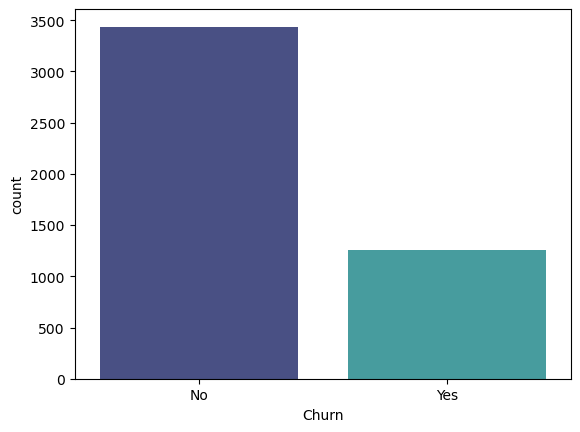

In [15]:
# # Countplot of churn feature
print(data['Churn'].value_counts())

sns.countplot(data, x='Churn', palette='mako')
plt.show()


In [16]:
len(data[data['Churn'] == 'Yes']) / len(data) * 100

26.70078908082747

- The 26.62% are churned customers and the 73.37% are loyal customers.

* **The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.**

## Numerical Feature Analysis

In [17]:
# Groupby Churn by total charges, monthly charges, tenure.
data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

tenure                                                      \
        count       mean        std  min   25%   50%    75%   max   
Churn                                                               
No     3437.0  37.560081  24.046683  1.0  15.0  38.0  61.00  72.0   
Yes    1252.0  18.036741  19.526209  1.0   2.0  10.0  29.25  72.0   

      MonthlyCharges            ...               TotalCharges               \
               count      mean  ...   75%     max        count         mean   
Churn                           ...                                           
No            3437.0  60.87764  ...  88.0  118.75       3437.0  2539.357550   
Yes           1252.0  73.74996  ...  94.0  118.35       1252.0  1521.736102   

                                                                   
               std    min       25%       50%        75%      max  
Churn                                                              
No     2331.079803  18.90  566.1000  1686.150  4200.2500  8672.45  
Yes    1878.135389  18.85  129.0875   685.975  2368.5625  8684.80  

[2 rows x 24 columns]

In [18]:
data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.560081,60.87764,2539.357550
Yes,18.036741,73.74996,1521.736102


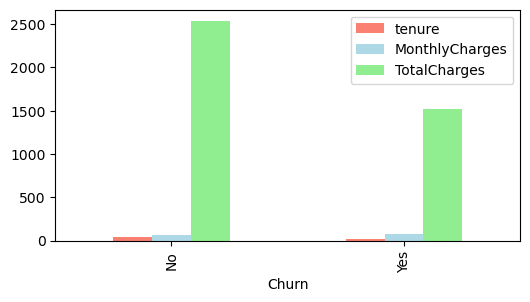

In [19]:
data.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean().plot(kind='bar', figsize=(6, 3), color=['salmon', 'lightblue', 'lightgreen']);

This barplot shows the average tenure (months of contract), MonthlyCharges and TotalCharges for churned and loyal customers. 
- The average tenure for churned customers is lower than loyal customers.

- We can see that the average monthly charges for churned customers is higher than loyal customers. 

- The average TotalCharges for churned customers is lower than loyal customers. This is because the churned customers have a shorter tenure than loyal customers.

### Distribution of Numerical Features

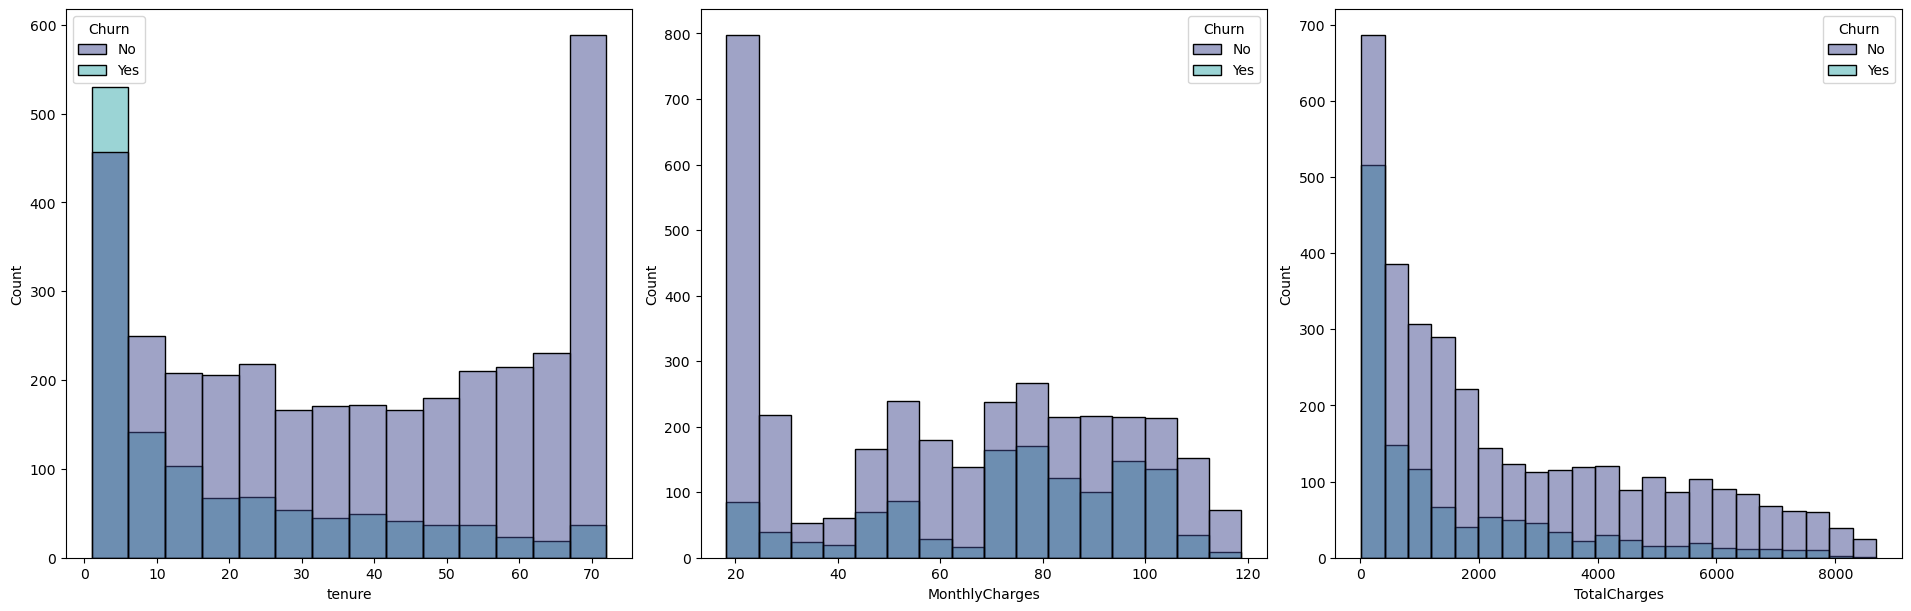

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(19, 6), constrained_layout=True)
sns.histplot(data, x='tenure', hue='Churn', ax=ax[0], palette='mako')
sns.histplot(data, x='MonthlyCharges', hue='Churn', ax=ax[1], palette='mako')
sns.histplot(data, x='TotalCharges', hue='Churn', ax=ax[2], palette='mako')
plt.show()


### Pairplot of numerical features

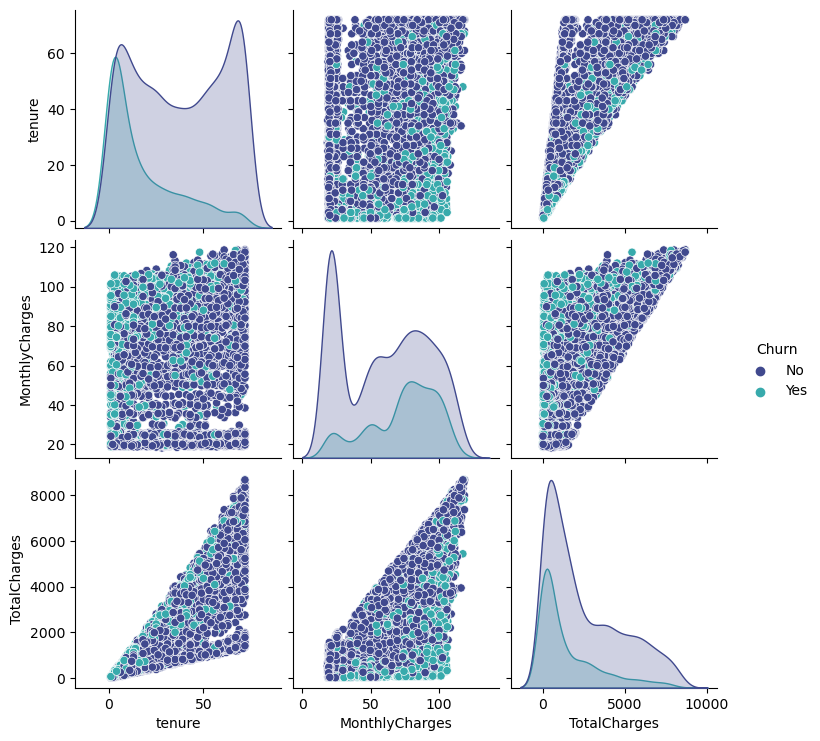

In [21]:
# Pairplot of numerical features (Hue as Churn)
sns.pairplot(data, hue='Churn', palette='mako')
plt.show()


### Correlation Heatmap of Numerical Features

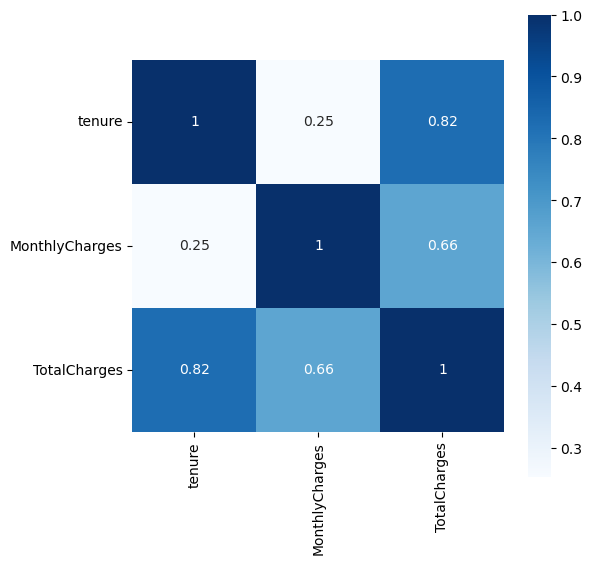

In [22]:
corr_matrix = data[numeric_cols].corr()

plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, square=True, fmt='.2g', cmap='Blues')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### ANOVA F-Statistic for numerical variables

In [23]:
# H0: There is no significant difference between the means of the groups
# H1: There is a significant difference between the means of the groups

X_train_num = data.select_dtypes(include=np.number)
y_train = data['Churn']

# Calculate the F Statistic and corresponding p value
f_stat, p_value = f_classif(X_train_num, y_train)

# Create a dataframe to store the results
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': f_stat, 'p values': p_value.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table['H0'] = ANOVA_F_table['p values'].apply(lambda x: 'Reject H0' if x < 0.05 else 'Fail to reject H0')

ANOVA_F_table

,Numerical_Feature,F-Score,p values,H0
0,tenure,665.424376,0.0,Reject H0
1,TotalCharges,192.958759,0.0,Reject H0
2,MonthlyCharges,173.045401,0.0,Reject H0


All numerical features are statistically significant since the p-value is less than 0.05. That means that the numerical features are correlated with the target variable.

### Outliers Detection & Treatment

In [24]:
# Outlier detection with z-score method
# z = (X - mean) / std 
# z_thresh = 3 is a common value for removing outliers

print("Before dropping numerical outliers, length of the dataframe is: ",len(data))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
data_without_outliers = drop_numerical_outliers(data)
print("After dropping numerical outliers, length of the dataframe is: ",len(data))



Before dropping numerical outliers, length of the dataframe is:  4689
After dropping numerical outliers, length of the dataframe is:  4689


No outliers were detected in the numerical features. If we reduce the z_threshold to 2, we will have 2 outliers in the MonthlyCharges feature. However, we will not remove them since they are not extreme values, and the dataset size is small.

### Dropping Highly Correlated Features (corr > 0.9)

In [25]:
print("The original dataframe has {} columns.".format(data.shape[1]))

# Calculate the correlation matrix and take the absolute value
corr_matrix = data[numeric_cols].corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

data = data.drop(to_drop, axis=1)
print('drop col', to_drop)
print("The reduced dataframe has {} columns.".format(data.shape[1]))

The original dataframe has 20 columns.
drop col []
The reduced dataframe has 20 columns.


## Categorical Features Analysis

### Chi-Squared Test for Categorical Variables

In [26]:
# Chi-square test of independence
# H0: There is no relationship between the variables
# H1: There is a relationship between the variables
# Fail to reject H0 if p-value > 0.05 means there is no relationship between the variables
# Reject H0 if p-value < 0.05 means there is a relationship between the variables

# Create a function to perform chi-square test of independence
def chi_square_test_of_independence(data, target, categorical_cols, alpha=0.05):
    chi2_check = []
    p_value = []
    dof = []

    for i in categorical_cols:
        if stats.chi2_contingency(pd.crosstab(data[i], data[target]))[1] < alpha:
            chi2_check.append('Reject H0')
        else:
            chi2_check.append('Fail to reject H0')
        p_value.append(stats.chi2_contingency(pd.crosstab(data[i], data[target]))[1])
        dof.append(stats.chi2_contingency(pd.crosstab(data[i], data[target]))[2])

    chi_square_test = pd.DataFrame({'Categorical Variable': categorical_cols, 'Chi2-Test': chi2_check, 'P-Value': p_value, 'Degree of Freedom': dof})
    chi_square_test.sort_values(by='P-Value', ascending=True, inplace=True)
    chi_square_test.reset_index(drop=True, inplace=True)
    return chi_square_test

# Perform chi-square test of independence
chi_square_test_of_independence(data, 'Churn', categoric_cols)


,Categorical Variable,Chi2-Test,P-Value,Degree of Freedom
0,Churn,Reject H0,0.000000e+00,1
1,Contract,Reject H0,3.629788e-165,2
2,OnlineSecurity,Reject H0,1.252690e-121,2
3,TechSupport,Reject H0,7.431541e-111,2
4,InternetService,Reject H0,1.426903e-100,2
5,OnlineBackup,Reject H0,1.052875e-87,2
6,PaymentMethod,Reject H0,1.128570e-86,3
7,DeviceProtection,Reject H0,1.085143e-80,2
8,StreamingMovies,Reject H0,3.469448e-54,2
9,StreamingTV,Reject H0,4.486132e-53,2


PhoneService and gender fail to reject the null hypothesis, which means that they are not correlated with the target variable. We will drop them from the data set.

The rest of the categorical features are statistically significant since the p-value is less than 0.05. That means that the categorical features are correlated with the target variable.

In [27]:
# There is not relation of PhoneService and gender with churn, thus we can drop them
categoric_cols.remove('PhoneService')
categoric_cols.remove('gender')

drop_cols = ['gender', 'PhoneService']
data.drop(drop_cols, axis=1, inplace=True)

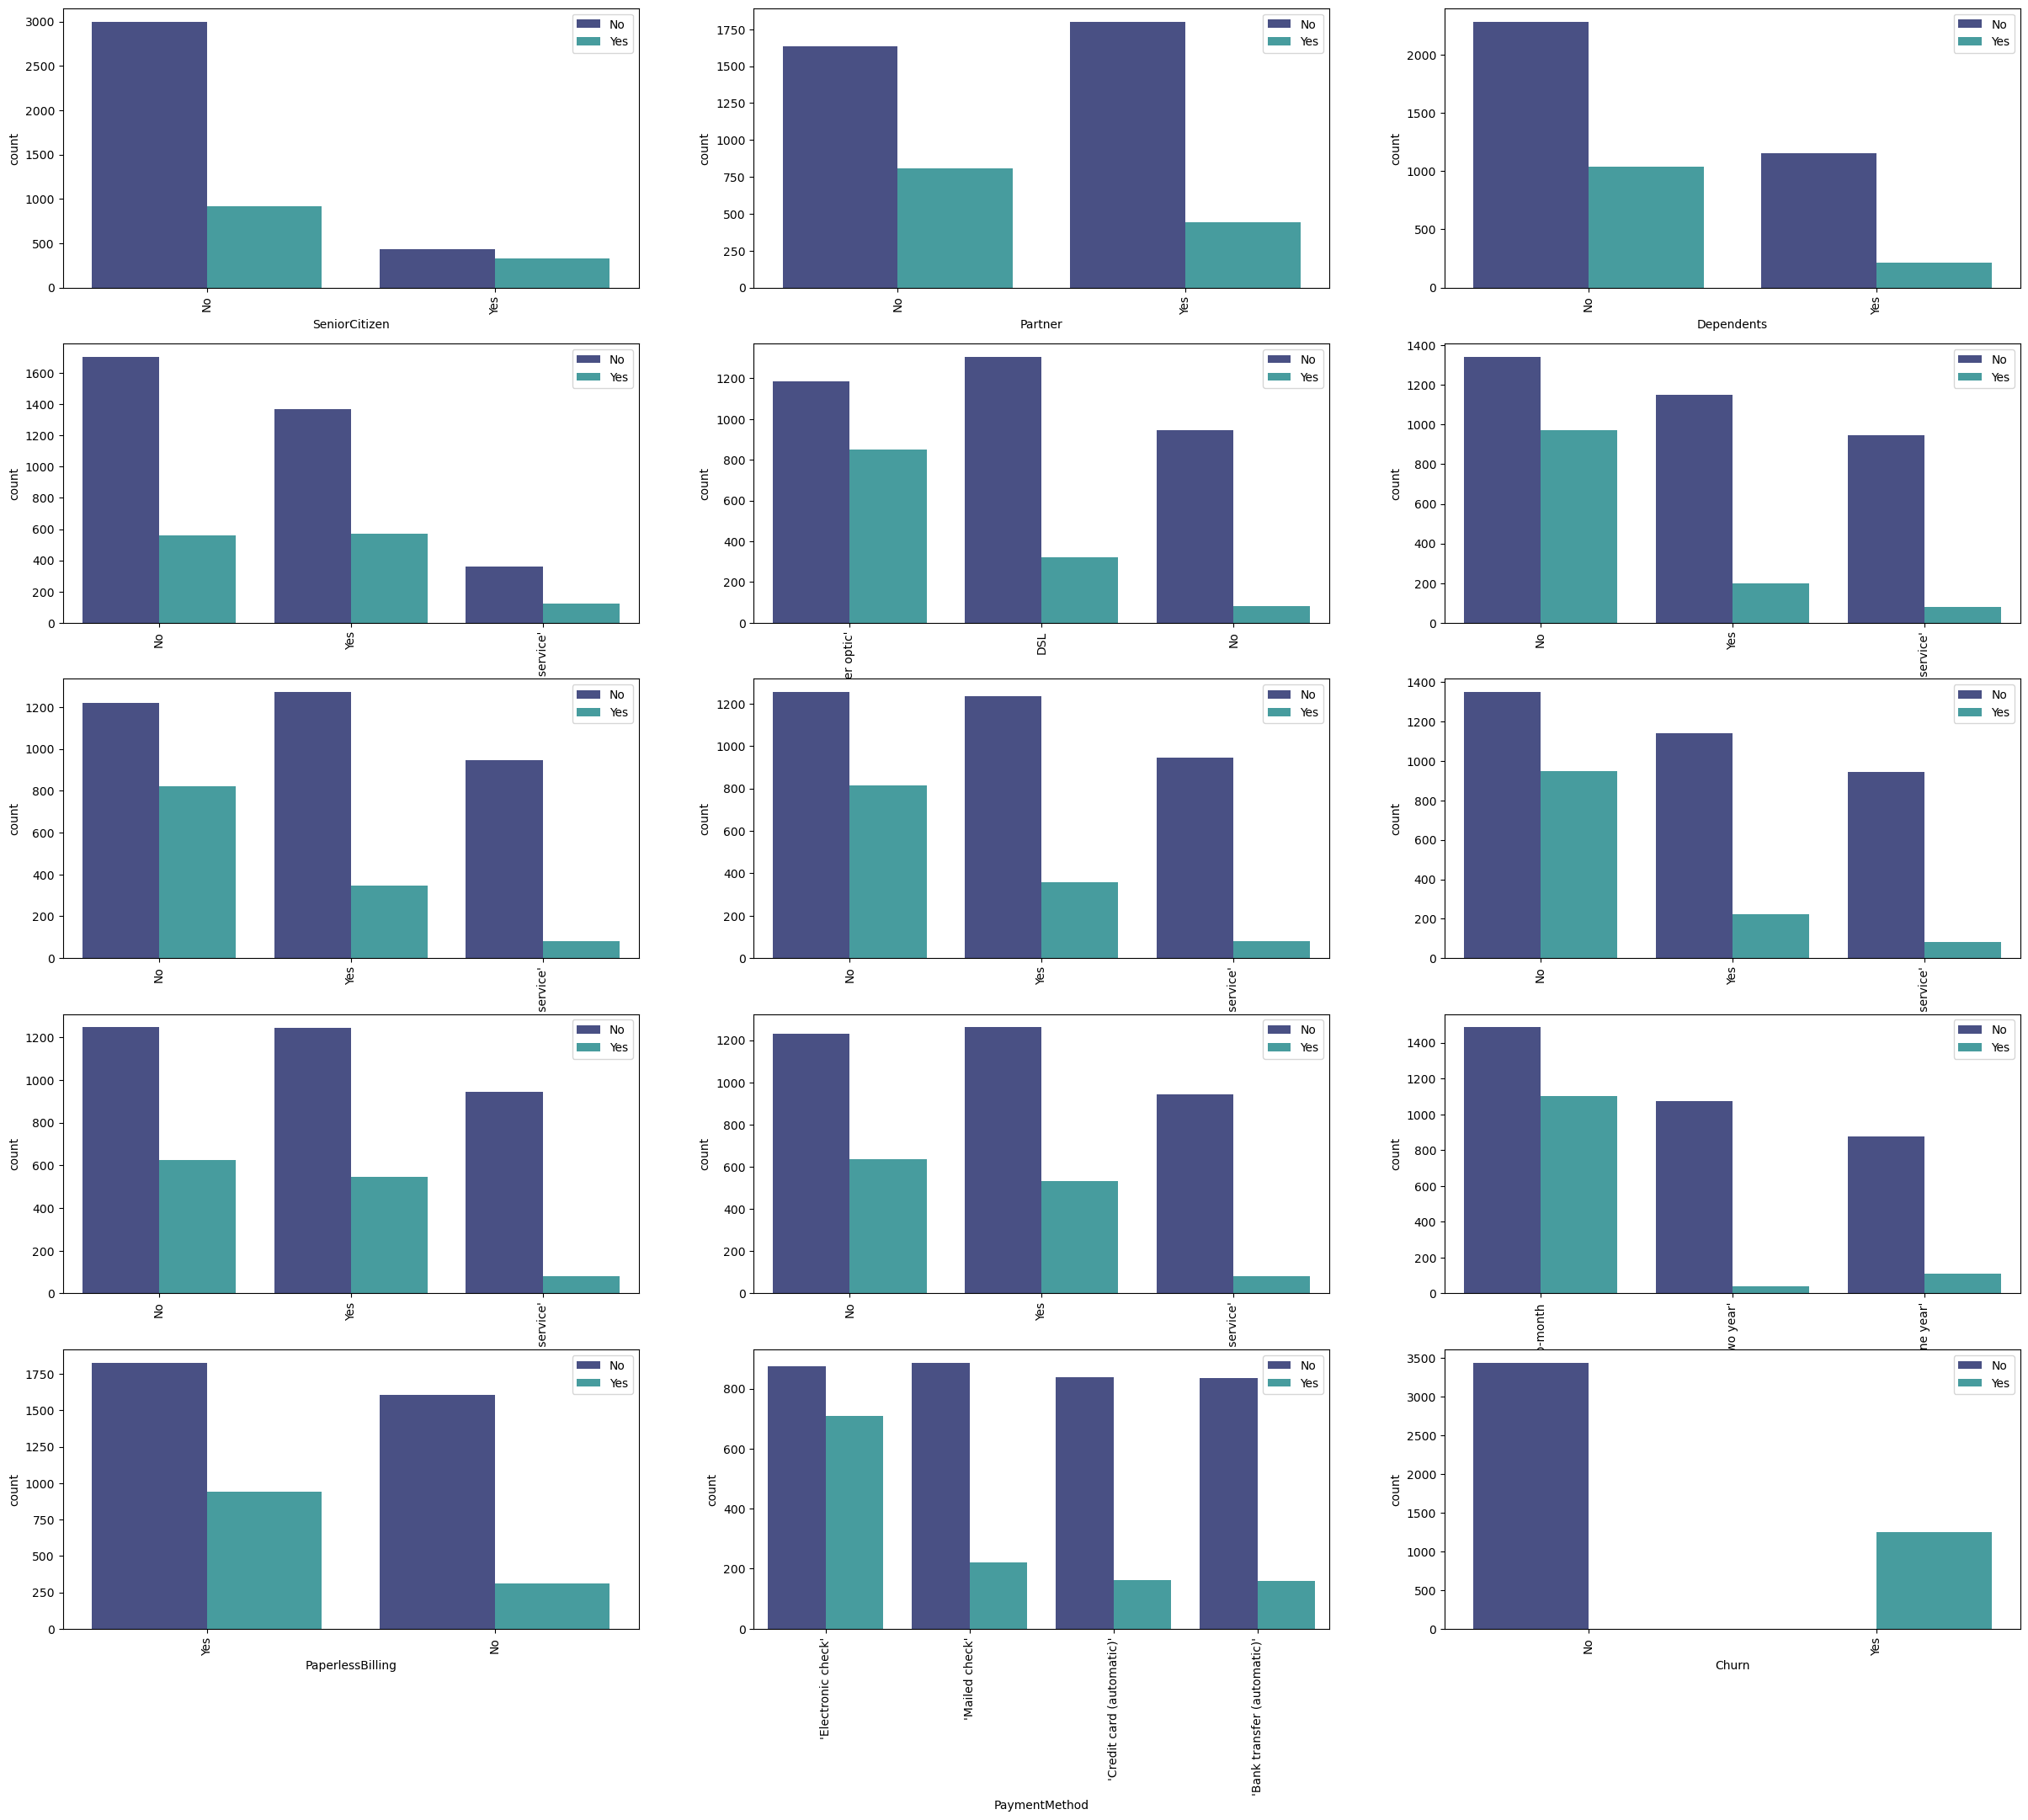

In [28]:
# for i in categoric_cols:
#     plt.figure(figsize=(6, 3))
#     sns.countplot(data=data, x=i, hue='Churn', order=data[i].value_counts().index , palette='mako')
#     plt.xticks(rotation=0)
#     plt.legend(loc='upper right')
#     plt.show()

# Grid View
fig, ax = plt.subplots(5, 3, figsize=(30, 25))
for i, subplot in zip(categoric_cols, ax.flatten()):
    sns.countplot(data=data, x=i, hue='Churn', order=data[i].value_counts().iloc[0:15].index , palette='mako', ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90)
    subplot.legend(loc='upper right')


* From the plot about the Customer Contract, we obtain that those customers with "Month-to-Month" Contract are leaving the company (Churn).

* Also, from the plot about the Paperless Billing we can see that more customers that have Paperless Billing are Churn than those without. 

* From the PaymentMethod barplot, we can notice that there are more Churn customers with Electronic Check as Payment method than customers with other payment methods.

* A worth mentioned information from the graphs is that there are significantly more Churn customers without Online Security and without Tech Support. Furthermore, Customers with Fiber-optic Internet service are keen to leave the company.


# Data Encoding

### Dummy variable encoding for categorical features
We need to convert the categorical features to numerical features (i.e. dummy variables) for the predictive task.


In [29]:
# Transforming "Churn" feature rows into 0 and 1.
data['Churn'] = data['Churn'].map({'No':0, 'Yes':1}).astype('int')
data.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,Yes,61,'No phone service',DSL,Yes,No,Yes,No,No,No,Month-to-month,No,'Bank transfer (automatic)',33.60,2117.20,0
1,No,Yes,Yes,72,Yes,'Fiber optic',No,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',90.45,6565.85,0
2,No,No,No,5,Yes,'Fiber optic',No,No,No,No,Yes,No,Month-to-month,Yes,'Electronic check',84.00,424.75,0
3,No,No,No,49,No,DSL,Yes,Yes,Yes,Yes,No,No,'Two year',No,'Bank transfer (automatic)',67.40,3306.85,0
4,No,No,No,8,No,No,'No internet service','No internet service','No internet service','No internet service','No internet service','No internet service',Month-to-month,Yes,'Bank transfer (automatic)',19.70,168.90,0


In [30]:
# create dummy variables for categorical features
data = pd.get_dummies(data)

data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,61,33.60,2117.20,0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False
1,72,90.45,6565.85,0,True,False,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
2,5,84.00,424.75,0,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,49,67.40,3306.85,0,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,8,19.70,168.90,0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


# Feature Scaling for numerical Features

In [31]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_'One year',Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check'
0,0.845070,0.152736,0.242137,0.0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False
1,1.000000,0.718408,0.755486,0.0,True,False,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
2,0.056338,0.654229,0.046838,0.0,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,0.676056,0.489055,0.379416,0.0,True,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0.098592,0.014428,0.017315,0.0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


# Train-Test Split

In [32]:
# Split the data into train and test sets
X = data.drop(['Churn'],axis=1)
y = data['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [33]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3751, 938, 3751, 938)

# Over-sampling for class imbalance in "Churn" feature

In [34]:
data['Churn'].value_counts()

Churn
0.0    3437
1.0    1252
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE

sm = RandomOverSampler(random_state=123)
# sm = SMOTE(random_state=123)

In [36]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [37]:
print(X_train_over.shape)
print(y_train_over.shape)

(5502, 42)
(5502,)


In [38]:
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (3751, 42)
Before OverSampling, the shape of y_train: (3751,)
After OverSampling, the shape of X_train_over: (5502, 42)
After OverSampling, the shape of y_train_over: (5502,)


In [39]:
y_train_over.value_counts()

Churn
0.0    2751
1.0    2751
Name: count, dtype: int64

# Modeling

## Logistic Regression

In [40]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
y_pred = log_reg.predict(X_test)
print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
print('\nCross validation')
cv_scores = cross_val_score(log_reg, X_train_over, y_train_over, cv=10)
cv_pred = cross_val_predict(log_reg, X_train_over, y_train_over, cv=10)
print('Confusion matrix of Logistic Regression Classifier (CV) on training set:\n', confusion_matrix(y_train_over, cv_pred))
print('Classification report of Logistic Regression (CV) Classifier on training set:\n', classification_report(y_train_over, cv_pred))

# ROC curve
y_pred_proba1 = log_reg.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)


Accuracy score of Logistic Regression Classifier on test set: 0.78
Confusion matrix of Logistic Regression Classifier on test set:
 [[520 166]
 [ 45 207]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.92      0.76      0.83       686
         1.0       0.55      0.82      0.66       252

    accuracy                           0.78       938
   macro avg       0.74      0.79      0.75       938
weighted avg       0.82      0.78      0.79       938


Cross validation


Confusion matrix of Logistic Regression Classifier (CV) on training set:
 [[1980  771]
 [ 547 2204]]
Classification report of Logistic Regression (CV) Classifier on training set:
               precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      2751
         1.0       0.74      0.80      0.77      2751

    accuracy                           0.76      5502
   macro avg       0.76      0.76      0.76      5502
weighted avg       0.76      0.76      0.76      5502



## Random Forest Classifier

In [41]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_over, y_train_over)
y_pred = rf_clf.predict(X_test)
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
print('\nCross validation')
cv_scores = cross_val_score(rf_clf, X_train_over, y_train_over, cv=10)
cv_pred = cross_val_predict(rf_clf, X_train_over, y_train_over, cv=10)
print('Confusion matrix of Random Forest Classifier (CV) on training set:\n', confusion_matrix(y_train_over, cv_pred))
print('Classification report of Random Forest Classifier (CV) on training set:\n', classification_report(y_train_over, cv_pred))

# ROC curve
y_pred_prob2 = rf_clf.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

Accuracy score of Random Forest Classifier on test set: 0.78
Confusion matrix of Random Forest Classifier on test set:
 [[604  82]
 [121 131]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       686
         1.0       0.62      0.52      0.56       252

    accuracy                           0.78       938
   macro avg       0.72      0.70      0.71       938
weighted avg       0.77      0.78      0.78       938


Cross validation
Confusion matrix of Random Forest Classifier (CV) on training set:
 [[2313  438]
 [  77 2674]]
Classification report of Random Forest Classifier (CV) on training set:
               precision    recall  f1-score   support

         0.0       0.97      0.84      0.90      2751
         1.0       0.86      0.97      0.91      2751

    accuracy                           0.91      5502
   macro avg       0.91      0.91      0.91      5502
weighted

In [42]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_over, y_train_over)
y_pred = ada_clf.predict(X_test)
print('Accuracy score of AdaBoost Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of AdaBoost Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of AdaBoost Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
print('\nCross validation')
cv_scores = cross_val_score(ada_clf, X_train_over, y_train_over, cv=10)
cv_pred = cross_val_predict(ada_clf, X_train_over, y_train_over, cv=10)
print('Confusion matrix of AdaBoost Classifier (CV) on training set:\n', confusion_matrix(y_train_over, cv_pred))
print('Classification report of AdaBoost Classifier (CV) on training set:\n', classification_report(y_train_over, cv_pred))

# ROC curve
y_pred_prob3 = ada_clf.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

Accuracy score of AdaBoost Classifier on test set: 0.78
Confusion matrix of AdaBoost Classifier on test set:
 [[522 164]
 [ 44 208]]
Classification report of AdaBoost Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.92      0.76      0.83       686
         1.0       0.56      0.83      0.67       252

    accuracy                           0.78       938
   macro avg       0.74      0.79      0.75       938
weighted avg       0.82      0.78      0.79       938


Cross validation
Confusion matrix of AdaBoost Classifier (CV) on training set:
 [[1975  776]
 [ 517 2234]]
Classification report of AdaBoost Classifier (CV) on training set:
               precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      2751
         1.0       0.74      0.81      0.78      2751

    accuracy                           0.76      5502
   macro avg       0.77      0.76      0.76      5502
weighted avg       0.77      0.76

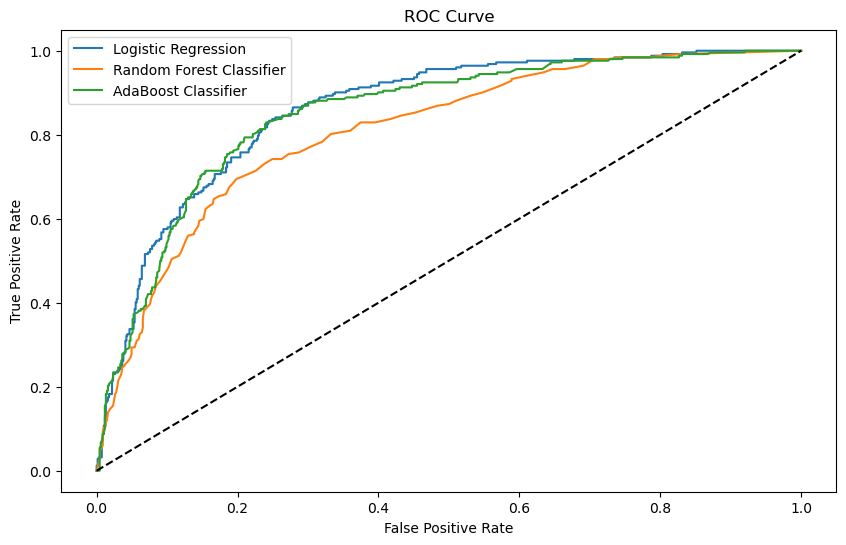

In [43]:
# Comparing ROC curves of Logistic Regression and Random Forest Classifier
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest Classifier')
plt.plot(fpr3, tpr3, label='AdaBoost Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


From the confusion matrices for both Logistic Regression and Random Forest Classifier:

For Logistic Regression:
- TP = 207 (actual positive and predicted positive)
- TN = 520 (actual negative and predicted negative)
- FP = 166 (actual negative but predicted positive)
- FN = 45 (actual positive but predicted negative)

For Random Forest:
- TP = 126 (actual positive and predicted positive)
- TN = 605 (actual negative and predicted negative)
- FP = 77 (actual negative but predicted positive)
- FN = 126 (actual positive but predicted negative)

For AdaBoost:

- TP = 208 (actual positive and predicted positive)
- TN = 522 (actual negative and predicted negative)
- FP = 164 (actual negative but predicted positive)
- FN = 44 (actual positive but predicted negative)


Even though the Random Forest model has a higher number of true negatives (TN), it has a lower number of true positives (TP) compared to the Logistic Regression model. This might be the reason why the Logistic Regression model is closer to the axis in the ROC curve, as the ROC curve considers both the true positive rate (TPR) and false positive rate (FPR).


The AdaBoost Classifier has a slightly higher number of true positives (TP) and true negatives (TN) than the Logistic Regression model, and a significantly higher number of true positives (TP) than the Random Forest model. It also has a lower number of false negatives (FN) than both models, and a number of false positives (FP) that is lower than Logistic Regression but higher than Random Forest.

This suggests that the AdaBoost Classifier might be a good balance between the other two models, performing well in both identifying positive cases (as indicated by the high TP and low FN) and avoiding false alarms (as indicated by the high TN and relatively low FP).

## Feature Selection with Random Forest Classifier

In [44]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_over, y_train_over)
sel.get_support()

selected_feat= X_train_over.columns[(sel.get_support())]

# len(selected_feat)
print(selected_feat)


Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_'Fiber optic'', 'OnlineSecurity_No', 'TechSupport_No',
       'Contract_'Two year'', 'Contract_Month-to-month',
       'PaymentMethod_'Electronic check''],
      dtype='object')


## Train and Evaluate Models with Selected Features

In [45]:
# Logistic Regression with selected features
log_reg_fs = LogisticRegression()
log_reg_fs.fit(X_train_over[selected_feat], y_train_over)
y_pred = log_reg_fs.predict(X_test[selected_feat])
print('Accuracy score of Logistic Regression Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Logistic Regression Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Logistic Regression Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
print('\nCross validation')
cv_scores = cross_val_score(log_reg_fs, X_train_over[selected_feat], y_train_over, cv=10)
cv_pred = cross_val_predict(log_reg_fs, X_train_over[selected_feat], y_train_over, cv=10)
print('Confusion matrix of Logistic Regression Classifier (CV) on training set:\n', confusion_matrix(y_train_over, cv_pred))
print('Classification report of Logistic Regression (CV) Classifier on training set:\n', classification_report(y_train_over, cv_pred))

# ROC curve
y_pred_proba4 = log_reg_fs.predict_proba(X_test[selected_feat])[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_proba4)


Accuracy score of Logistic Regression Classifier on test set: 0.76
Confusion matrix of Logistic Regression Classifier on test set:
 [[511 175]
 [ 49 203]]
Classification report of Logistic Regression Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       686
         1.0       0.54      0.81      0.64       252

    accuracy                           0.76       938
   macro avg       0.72      0.78      0.73       938
weighted avg       0.81      0.76      0.77       938


Cross validation
Confusion matrix of Logistic Regression Classifier (CV) on training set:
 [[1959  792]
 [ 588 2163]]
Classification report of Logistic Regression (CV) Classifier on training set:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      2751
         1.0       0.73      0.79      0.76      2751

    accuracy                           0.75      5502
   macro avg       0.75      0.7

In [46]:
# Random Forest Classifier with selected features
rf_clf_fs = RandomForestClassifier()
rf_clf_fs.fit(X_train_over[selected_feat], y_train_over)
y_pred = rf_clf_fs.predict(X_test[selected_feat])
print('Accuracy score of Random Forest Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of Random Forest Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of Random Forest Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
print('\nCross validation')
cv_scores = cross_val_score(rf_clf_fs, X_train_over[selected_feat], y_train_over, cv=10)
cv_pred = cross_val_predict(rf_clf_fs, X_train_over[selected_feat], y_train_over, cv=10)
print('Confusion matrix of Random Forest Classifier (CV) on training set:\n', confusion_matrix(y_train_over, cv_pred))
print('Classification report of Random Forest Classifier (CV) on training set:\n', classification_report(y_train_over, cv_pred))

# ROC curve
y_pred_prob5 = rf_clf_fs.predict_proba(X_test[selected_feat])[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)



Accuracy score of Random Forest Classifier on test set: 0.77
Confusion matrix of Random Forest Classifier on test set:
 [[588  98]
 [118 134]]
Classification report of Random Forest Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       686
         1.0       0.58      0.53      0.55       252

    accuracy                           0.77       938
   macro avg       0.71      0.69      0.70       938
weighted avg       0.76      0.77      0.77       938


Cross validation
Confusion matrix of Random Forest Classifier (CV) on training set:
 [[2273  478]
 [  97 2654]]
Classification report of Random Forest Classifier (CV) on training set:
               precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      2751
         1.0       0.85      0.96      0.90      2751

    accuracy                           0.90      5502
   macro avg       0.90      0.90      0.89      5502
weighted

In [47]:
# AdaBoost Classifier with selected features
from sklearn.ensemble import AdaBoostClassifier

ada_clf_fs = AdaBoostClassifier()
ada_clf_fs.fit(X_train_over[selected_feat], y_train_over)
y_pred = ada_clf_fs.predict(X_test[selected_feat])
print('Accuracy score of AdaBoost Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix of AdaBoost Classifier on test set:\n', confusion_matrix(y_test, y_pred))
print('Classification report of AdaBoost Classifier on test set:\n', classification_report(y_test, y_pred))

# cross validation
print('\nCross validation')
cv_scores = cross_val_score(ada_clf_fs, X_train_over[selected_feat], y_train_over, cv=10)
cv_pred = cross_val_predict(ada_clf_fs, X_train_over[selected_feat], y_train_over, cv=10)
print('Confusion matrix of AdaBoost Classifier (CV) on training set:\n', confusion_matrix(y_train_over, cv_pred))
print('Classification report of AdaBoost Classifier (CV) on training set:\n', classification_report(y_train_over, cv_pred))

# ROC curve for AdaBoost Classifier
y_pred_prob6 = ada_clf_fs.predict_proba(X_test[selected_feat])[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)



Accuracy score of AdaBoost Classifier on test set: 0.77
Confusion matrix of AdaBoost Classifier on test set:
 [[512 174]
 [ 43 209]]
Classification report of AdaBoost Classifier on test set:
               precision    recall  f1-score   support

         0.0       0.92      0.75      0.83       686
         1.0       0.55      0.83      0.66       252

    accuracy                           0.77       938
   macro avg       0.73      0.79      0.74       938
weighted avg       0.82      0.77      0.78       938


Cross validation
Confusion matrix of AdaBoost Classifier (CV) on training set:
 [[1964  787]
 [ 527 2224]]
Classification report of AdaBoost Classifier (CV) on training set:
               precision    recall  f1-score   support

         0.0       0.79      0.71      0.75      2751
         1.0       0.74      0.81      0.77      2751

    accuracy                           0.76      5502
   macro avg       0.76      0.76      0.76      5502
weighted avg       0.76      0.76

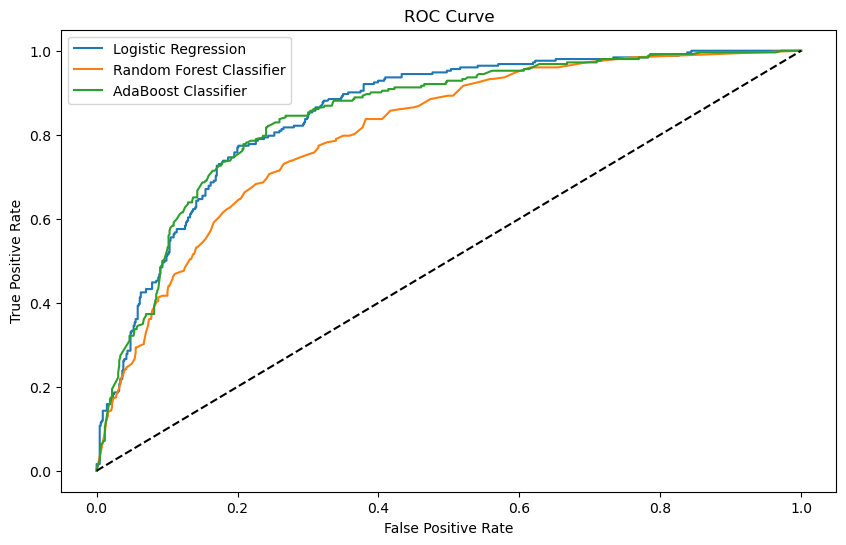

In [48]:
# ROC curve of Logistic Regression and Random Forest Classifier with selected features
plt.figure(figsize=(10, 6))
plt.title('ROC Curve with selected features')
plt.plot(fpr4, tpr4, label='Logistic Regression')
plt.plot(fpr5, tpr5, label='Random Forest Classifier')
plt.plot(fpr6, tpr6, label='AdaBoost Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The confusion matrices for the three models after feature selection with Random Forest are as follows:

Logistic Regression:
- TP = 203 (actual positive and predicted positive)
- TN = 511 (actual negative and predicted negative)
- FP = 175 (actual negative but predicted positive)
- FN = 49 (actual positive but predicted negative)

Random Forest:
- TP = 131 (actual positive and predicted positive)
- **TN = 579 (actual negative and predicted negative)**
- FP = 107 (actual negative but predicted positive)
- FN = 121 (actual positive but predicted negative)


AdaBoost:
- **TP = 209 (actual positive and predicted positive)**
- TN = 512 (actual negative and predicted negative)
- FP = 174 (actual negative but predicted positive)
- ***FN = 43 (actual positive but predicted negative)***

Conclusion:
1. AdaBoost model has the highest number of true positives (TP) and the lowest number of false negatives (FN), suggesting it is the best at correctly identifying positive cases. 
2. Random Forest model has the highest number of true negatives (TN) and the lowest number of false positives (FP), suggesting it is the best at correctly identifying negative cases.

# Test data - New unseen Customer data

In [49]:
new_customer = pd.read_csv('../data/churn-test.csv')

In [50]:
# Apply the Data preprocessing steps
new_customer.TotalCharges = pd.to_numeric(new_customer.TotalCharges, errors='coerce')

# Correct the data types of the features
new_customer['TotalCharges'] = pd.to_numeric(new_customer['TotalCharges'], errors='coerce') # coerce will replace the error with NaN
new_customer['SeniorCitizen'] = new_customer['SeniorCitizen'].replace({0:'No',1:'Yes'})
new_customer['SeniorCitizen'] = new_customer['SeniorCitizen'].astype('object')


# Feature scaling with MinMaxScaler for numerical features
new_customer['tenure'] = transformer.fit_transform(new_customer['tenure'].values.reshape(-1,1))
new_customer['MonthlyCharges'] = transformer.fit_transform(new_customer['MonthlyCharges'].values.reshape(-1,1))
new_customer['TotalCharges'] = transformer.fit_transform(new_customer['TotalCharges'].values.reshape(-1,1))

# Drop the columns that are not in the training set
new_customer.drop(drop_cols, axis=1, inplace=True)


# drop nan values
new_customer.dropna(inplace=True)

new_customer['Churn'] = new_customer['Churn'].map({'No':0, 'Yes':1}).astype('int')

new_customer = pd.get_dummies(new_customer)

In [51]:
# new_customer 
# from the new test set, how many are churn?
new_customer['Churn'].value_counts()

Churn
0    1726
1     617
Name: count, dtype: int64

In [52]:
# Predict the probability of churn for new customers

# # Logistic Regression with selected features
# new_customer['Churn_Probability'] = log_reg_fs.predict_proba(new_customer[selected_feat])[:,1]
# new_customer['Churn_Prediction'] = log_reg_fs.predict(new_customer[selected_feat])

# # Random Forest Classifier with selected features
# new_customer['Churn_Probability'] = rf_clf_fs.predict_proba(new_customer[selected_feat])[:,1]
# new_customer['Churn_Prediction'] = rf_clf_fs.predict(new_customer[selected_feat])

# AdaBoost Classifier with selected features
new_customer['Churn_Probability'] = ada_clf_fs.predict_proba(new_customer[selected_feat])[:,1]
new_customer['Churn_Prediction'] = ada_clf_fs.predict(new_customer[selected_feat])

new_customer.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Churn_Probability,Churn_Prediction
0,0.013889,0.114214,0.001293,0,True,False,False,True,True,False,...,False,True,False,True,False,False,True,False,0.508914,1.0
1,0.472222,0.384539,0.218899,0,True,False,True,False,True,False,...,False,False,True,False,False,False,False,True,0.491509,0.0
2,0.027778,0.353616,0.010455,1,True,False,True,False,True,False,...,False,True,False,True,False,False,False,True,0.502569,1.0
3,0.625000,0.238404,0.213195,0,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,0.492396,0.0
4,0.027778,0.521696,0.015545,1,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.510359,1.0


In [53]:
# evaluate the model
print('Accuracy score of Classifier on test set: {:.2f}'.format(accuracy_score(new_customer['Churn'], new_customer['Churn_Prediction'])))
print('Confusion matrix of Classifier on test set:\n', confusion_matrix(new_customer['Churn'], new_customer['Churn_Prediction']))
print('Classification report of Classifier on test set:\n', classification_report(new_customer['Churn'], new_customer['Churn_Prediction']))

Accuracy score of Classifier on test set: 0.74
Confusion matrix of Classifier on test set:
 [[1236  490]
 [ 113  504]]
Classification report of Classifier on test set:
               precision    recall  f1-score   support

           0       0.92      0.72      0.80      1726
           1       0.51      0.82      0.63       617

    accuracy                           0.74      2343
   macro avg       0.71      0.77      0.71      2343
weighted avg       0.81      0.74      0.76      2343



In [54]:
# how many of the churned customers did we catch from the new customers?
new_customer[new_customer['Churn'] == 1]['Churn_Prediction'].value_counts()

Churn_Prediction
1.0    504
0.0    113
Name: count, dtype: int64

### Predicting Churned Customers:
* Logistic Regression with selected features: 506 out of 617 churned customers are predicted correctly (81.98%)
* Random Forest Classifier with selected features: 345 out of 617 churned customers are predicted correctly (55.88%)
* AdaBoost Classifier with selected features: 504 out of 617 churned customers are predicted correctly (81.66%)

In [55]:
# Sample dataframe for presentation
new_customer.sample(frac=0.5)

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Churn_Probability,Churn_Prediction
353,0.055556,0.662344,0.041318,1,True,False,False,True,False,True,...,False,True,False,True,True,False,False,False,0.505065,1.0
1224,0.013889,0.273815,0.003165,1,True,False,False,True,False,True,...,False,True,False,True,False,False,False,True,0.501800,1.0
2152,0.013889,0.316209,0.003663,0,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.503834,1.0
1879,0.013889,0.515212,0.005997,1,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.509131,1.0
322,0.013889,0.263342,0.003042,0,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.503834,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.611111,0.429925,0.316337,0,True,False,False,True,True,False,...,False,False,False,True,False,False,False,True,0.493162,0.0
875,0.041667,0.163591,0.011134,0,True,False,True,False,True,False,...,False,True,False,True,False,True,False,False,0.504839,1.0
1239,0.041667,0.401995,0.017529,0,True,False,False,True,False,True,...,False,True,False,True,False,True,False,False,0.504019,1.0
546,0.541667,0.677307,0.379969,1,True,False,False,True,False,True,...,False,True,False,True,False,False,False,True,0.501702,1.0


In [56]:
# Dataframe with the churn customers
new_customer[new_customer['Churn_Prediction'] == 1]

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_'Two year',Contract_Month-to-month,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_'Bank transfer (automatic)',PaymentMethod_'Credit card (automatic)',PaymentMethod_'Electronic check',PaymentMethod_'Mailed check',Churn_Probability,Churn_Prediction
0,0.013889,0.114214,0.001293,0,True,False,False,True,True,False,...,False,True,False,True,False,False,True,False,0.508914,1.0
2,0.027778,0.353616,0.010455,1,True,False,True,False,True,False,...,False,True,False,True,False,False,False,True,0.502569,1.0
4,0.027778,0.521696,0.015545,1,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.510359,1.0
5,0.111111,0.810474,0.093811,1,True,False,True,False,True,False,...,False,True,False,True,False,False,True,False,0.509746,1.0
6,0.305556,0.705237,0.225908,0,True,False,True,False,False,True,...,False,True,False,True,False,True,False,False,0.501700,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,0.222222,0.664838,0.160585,0,False,True,False,True,True,False,...,False,True,False,True,False,True,False,False,0.504168,1.0
2336,0.236111,0.518703,0.139862,1,True,False,False,True,True,False,...,False,True,False,True,True,False,False,False,0.503282,1.0
2339,0.291667,0.756608,0.228757,1,False,True,True,False,True,False,...,False,True,False,True,False,False,True,False,0.505179,1.0
2342,0.416667,0.877805,0.373639,0,True,False,True,False,True,False,...,False,True,True,False,True,False,False,False,0.504647,1.0
